# **Breast cancer detection**

**Prepared by Mr. Hemant Gautam & Mr. Jane Alam **

**H20 Auto ML**

Project- Analysing Breast Cancer using Python to make predictions.

**Introduction**

The aim of this project is to to understand the process of organizing and preparing the data, selecting the features, choosing and applying the H2O AutoML tool, comparing, selecting and improving the best models.

The features from the data set describe characteristics of the cell nuclei and are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. As described in UCI Machine Learning Repository, the attribute informations are:

**Attribute Information:**

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)



In [2]:
!pip install h2o

     |████████████████████████████████| 128.4MB 80kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.6-py2.py3-none-any.whl size=128412300 sha256=4cc50733b777dfbd7ad039fee59085e45ba22927805a40629ab14d9ba9fe7886
  Stored in directory: /root/.cache/pip/wheels/de/4c/dd/4813e95c4b5328b4de2e2e1aa56ca66a547f45d11fe47c3c8a
Successfully built h2o


In [3]:
import h2o

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpdb_yj8yb
  JVM stdout: /tmp/tmpdb_yj8yb/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpdb_yj8yb/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.6
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_2x0x8j
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


**We are using H20 Auto ML Library for this project**

In [5]:
from h2o.automl import H2OAutoML

In [9]:
path = "https://raw.githubusercontent.com/alamjane/Project/master/Breast%20Cancer.csv"
df = h2o.import_file(path)


Parse progress: |█████████████████████████████████████████████████████████| 100%


***Using Type function to see the data is categorical or integer***

In [10]:
df.types

{'C33': 'int',
 'area_mean': 'real',
 'area_se': 'real',
 'area_worst': 'real',
 'compactness_mean': 'real',
 'compactness_se': 'real',
 'compactness_worst': 'real',
 'concave points_mean': 'real',
 'concave points_se': 'real',
 'concave points_worst': 'real',
 'concavity_mean': 'real',
 'concavity_se': 'real',
 'concavity_worst': 'real',
 'diagnosis': 'enum',
 'fractal_dimension_mean': 'real',
 'fractal_dimension_se': 'real',
 'fractal_dimension_worst': 'real',
 'id': 'int',
 'perimeter_mean': 'real',
 'perimeter_se': 'real',
 'perimeter_worst': 'real',
 'radius_mean': 'real',
 'radius_se': 'real',
 'radius_worst': 'real',
 'smoothness_mean': 'real',
 'smoothness_se': 'real',
 'smoothness_worst': 'real',
 'symmetry_mean': 'real',
 'symmetry_se': 'real',
 'symmetry_worst': 'real',
 'texture_mean': 'real',
 'texture_se': 'real',
 'texture_worst': 'real'}

**Summary of the Dataset**

*To find Mean, Standard Deviation & Quartile range*

In [11]:
df.describe()

Rows:569
Cols:33




,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,C33
type,int,enum,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int
mins,8670.0,,6.981,9.71,43.79,143.5,0.05263,0.01938,0.0,0.0,0.106,0.04996,0.1115,0.3602,0.757,6.802,0.001713,0.002252,0.0,0.0,0.007882,0.0008948,7.93,12.02,50.41,185.2,0.07117,0.02729,0.0,0.0,0.1565,0.05504,NaN
mean,30371831.432337433,,14.127291739894554,19.289648506151142,91.96903339191564,654.8891036906855,0.0963602811950791,0.1043409841827768,0.08879931581722321,0.04891914586994728,0.18116186291739894,0.06279760984182778,0.4051720562390158,1.2168534270650264,2.8660592267135323,40.337079086116,0.007040978910369069,0.025478138840070302,0.03189371634446398,0.011796137082601053,0.020542298769771525,0.0037949038664323374,16.26918980667838,25.67722319859402,107.26121265377857,880.5831282952549,0.13236859402460457,0.2542650439367311,0.27218848330404216,0.11460622319859404,0.2900755711775044,0.0839458172231986,0.0
maxs,911320502.0,,28.11,39.28,188.5,2501.0,0.1634,0.3454,0.4268,0.2012,0.304,0.09744,2.873,4.885,21.98,542.2,0.03113,0.1354,0.396,0.05279,0.07895,0.02984,36.04,49.54,251.2,4254.0,0.2226,1.058,1.252,0.291,0.6638,0.2075,NaN
sigma,125020585.61222367,,3.524048826212077,4.301035768166949,24.298981038754906,351.9141291816529,0.014064128137673621,0.052812757932512194,0.07971980870789348,0.038802844859153605,0.02741428133603572,0.007060362795084459,0.2773127329861039,0.5516483926172023,2.0218545540421076,45.4910055161318,0.003002517943839066,0.017908179325677388,0.030186060322988408,0.006170285174046869,0.008266371528798399,0.0026460709670891955,4.833241580469323,6.146257623038319,33.602542269036356,569.3569926699489,0.022832429404835465,0.157336488913742,0.2086242806081323,0.06573234119594205,0.06186746753751869,0.018061267348893986,-0.0
zeros,0,,0,0,0,0,0,0,13,13,0,0,0,0,0,0,0,0,13,13,0,0,0,0,0,0,0,0,13,13,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,569
0,842302.0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,nan
1,842517.0,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902,nan
2,84300903.0,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,nan


**Now we can split the data into Train, Test and Validation** 

*70 % data for Training, 15 % data for Testing, 15 % data for validation*

In [12]:
train,test,valid = df.split_frame(ratios=[.7, .15])

In [13]:
train

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,C33
842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902,nan
8.43009e+07,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,nan
8.43483e+07,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,nan
843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.00751,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244,nan
844359,M,18.25,19.98,119.6,1040,0.09463,0.109,0.1127,0.074,0.1794,0.05742,0.4467,0.7732,3.18,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,nan
8.44582e+07,M,13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.377,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.6,897,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151,nan
844981,M,13,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389,0.3063,1.002,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.2,739.3,0.1703,0.5401,0.539,0.206,0.4378,0.1072,nan
8.4501e+07,M,12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.203,0.08243,0.2976,1.599,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.01008,15.09,40.68,97.65,711.4,0.1853,1.058,1.105,0.221,0.4366,0.2075,nan
845636,M,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,0.3795,1.187,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.0146,0.003042,19.19,33.88,123.8,1150,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,nan
8.461e+07,M,15.78,17.89,103.6,781,0.0971,0.1292,0.09954,0.06606,0.1842,0.06082,0.5058,0.9849,3.564,54.16,0.005771,0.04061,0.02791,0.01282,0.02008,0.004144,20.42,27.28,136.5,1299,0.1396,0.5609,0.3965,0.181,0.3792,0.1048,nan


***Our target value(Diagnosis) will be stored in Y, remaining value will be stored in X***

In [35]:
y = "diagnosis"
x = df.columns
x.remove(y)
x.remove("id")

*We are taking Maximum run time is 10 and excluding deep learning, stacked ensemble. For cross validation, we can make it 0 otherwise H20 will take 5 by default.*

In [15]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

***Here we are calling Train function and passing input variables and ouput columns with validation***

In [17]:
aml.train(x = x, y = y, training_frame = train, validation_frame=valid)

AutoML progress: |
14:08:31.749: Project: AutoML_20200718_140831744
14:08:31.750: Cross-validation disabled by user: no fold column nor nfolds > 1.
14:08:31.750: Setting stopping tolerance adaptively based on the training frame: 0.05
14:08:31.750: Build control seed: 10
14:08:31.750: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
14:08:31.824: training frame: Frame key: automl_training_py_2_sid_a9b4    cols: 33    rows: 351  chunks: 8    size: 108487  checksum: 8336821047381437824
14:08:31.825: validation frame: Frame key: py_4_sid_a9b4    cols: 33    rows: 90  chunks: 8    size: 32829  checksum: 1007871696238209968
14:08:31.831: leaderboard frame: Frame key: automl_leaderboard_py_2_sid_a9b4    cols: 33    rows: 39  chunks: 8    size: 32338  checksum: 5947587111294523264
14:08:31.831: blending frame: NULL
14:08:31.831: response column: diagnosis
14:08:31.831: fold c

***To check list of models having best accuracy we use Leaderboard***

In [18]:
lb = aml.leaderboard

In [19]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_20200718_140831,1,0.0374983,1,0,0.0801144,0.00641832
GBM_4_AutoML_20200718_140831,1,0.109966,1,0,0.175902,0.0309415
GBM_5_AutoML_20200718_140831,1,0.0678713,1,0,0.140142,0.0196397
XGBoost_3_AutoML_20200718_140831,1,0.0654956,1,0,0.137815,0.0189929
XGBoost_1_AutoML_20200718_140831,1,0.0815044,1,0,0.136441,0.0186161
DRF_1_AutoML_20200718_140831,1,0.100536,1,0,0.172403,0.0297227
GBM_1_AutoML_20200718_140831,1,0.11607,1,0,0.197374,0.0389564
GBM_3_AutoML_20200718_140831,0.994709,0.120509,0.993821,0.0238095,0.176914,0.0312985
GBM_2_AutoML_20200718_140831,0.992063,0.11791,0.990453,0.0238095,0.167014,0.0278937
XGBoost_2_AutoML_20200718_140831,0.988095,0.194256,0.986529,0.0515873,0.227715,0.0518539


***In above leaderboard GLM 1(Generalized linear model) has better accuracy than other models***

Abbreviation:-

XGBoost - eXtreme Gradient Boosting

DRF - Distributed Random Forest (DRF)

GBM - Gradient Boosting Machine 


***Predicting the data***

In [20]:
pred=aml.leader.predict(test)

glm prediction progress: |████████████████████████████████████████████████| 100%


In [21]:
pred.head()

predict,B,M
M,3.09359e-09,1
M,0.000134776,0.999865
M,0.0142254,0.985775
B,0.993961,0.00603943
M,0.00286202,0.997138
M,0.00314093,0.996859
B,0.998563,0.00143736
B,0.999118,0.000882398
M,0.0016899,0.99831
B,0.991282,0.00871809


***Generating the perfomance report***

In [22]:
aml.leader.model_performance(test)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.017875230450472606
RMSE: 0.13369828140433446
LogLoss: 0.093340016475513
Null degrees of freedom: 88
Residual degrees of freedom: 58
Null deviance: 115.12940640130682
Residual deviance: 16.61452293264132
AIC: 78.61452293264132
AUC: 0.9849833147942159
AUCPR: 0.9848523531219204
Gini: 0.9699666295884317

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4528736255126801: 


,,B,M,Error,Rate
0,B,58.0,0.0,0.0,(0.0/58.0)
1,M,1.0,30.0,0.0323,(1.0/31.0)
2,Total,59.0,30.0,0.0112,(1.0/89.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.452874,0.983607,23.0
1,max f2,0.452874,0.974026,23.0
2,max f0point5,0.452874,0.993377,23.0
3,max accuracy,0.452874,0.988764,23.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.006220,1.000000,51.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.452874,0.975366,23.0
8,max min_per_class_accuracy,0.452874,0.967742,23.0
9,max mean_per_class_accuracy,0.452874,0.983871,23.0



Gains/Lift Table: Avg response rate: 34.83 %, avg score: 35.02 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011236,1.000000,2.870968,2.870968,1.000000,1.000000,1.000000,1.000000,0.032258,0.032258,187.096774,187.096774,0.032258
1,2,0.022472,1.000000,2.870968,2.870968,1.000000,1.000000,1.000000,1.000000,0.032258,0.064516,187.096774,187.096774,0.064516
2,3,0.033708,1.000000,2.870968,2.870968,1.000000,1.000000,1.000000,1.000000,0.032258,0.096774,187.096774,187.096774,0.096774
3,4,0.044944,1.000000,2.870968,2.870968,1.000000,1.000000,1.000000,1.000000,0.032258,0.129032,187.096774,187.096774,0.129032
4,5,0.056180,1.000000,2.870968,2.870968,1.000000,1.000000,1.000000,1.000000,0.032258,0.161290,187.096774,187.096774,0.161290
5,6,0.101124,0.999998,2.870968,2.870968,1.000000,1.000000,1.000000,1.000000,0.129032,0.290323,187.096774,187.096774,0.290323
6,7,0.157303,0.999883,2.870968,2.870968,1.000000,0.999970,1.000000,0.999989,0.161290,0.451613,187.096774,187.096774,0.451613
7,8,0.202247,0.998823,2.870968,2.870968,1.000000,0.999734,1.000000,0.999932,0.129032,0.580645,187.096774,187.096774,0.580645
8,9,0.303371,0.956945,2.870968,2.870968,1.000000,0.986793,1.000000,0.995553,0.290323,0.870968,187.096774,187.096774,0.870968
9,10,0.404494,0.133453,0.956989,2.392473,0.333333,0.386044,0.833333,0.843176,0.096774,0.967742,-4.301075,139.247312,0.864294


***Here rather than taking the leader, we can take all the models id so that we can go into one particular model and analyse further***

In [23]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [24]:
model_ids

['GLM_1_AutoML_20200718_140831',
 'GBM_4_AutoML_20200718_140831',
 'GBM_5_AutoML_20200718_140831',
 'XGBoost_3_AutoML_20200718_140831',
 'XGBoost_1_AutoML_20200718_140831',
 'DRF_1_AutoML_20200718_140831',
 'GBM_1_AutoML_20200718_140831',
 'GBM_3_AutoML_20200718_140831',
 'GBM_2_AutoML_20200718_140831',
 'XGBoost_2_AutoML_20200718_140831']

***We are taking one model i.e XGBoost***

In [25]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_20200718_140831


Model Summary: 


,,number_of_trees
0,,55.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.006177979763754717
RMSE: 0.07860012572352996
LogLoss: 0.03184172163472487
Mean Per-Class Error: 0.004464285714285698
AUC: 0.999859392575928
AUCPR: 0.9997539320015263
Gini: 0.9997187851518561

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27728208899497986: 


,,B,M,Error,Rate
0,B,222.0,2.0,0.0089,(2.0/224.0)
1,M,0.0,127.0,0.0,(0.0/127.0)
2,Total,222.0,129.0,0.0057,(2.0/351.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.277282,0.992188,117.0
1,max f2,0.277282,0.996860,117.0
2,max f0point5,0.606911,0.996810,113.0
3,max accuracy,0.606911,0.994302,113.0
4,max precision,0.999421,1.000000,0.0
5,max recall,0.277282,1.000000,117.0
6,max specificity,0.999421,1.000000,0.0
7,max absolute_mcc,0.277282,0.987778,117.0
8,max min_per_class_accuracy,0.277686,0.991071,116.0
9,max mean_per_class_accuracy,0.277282,0.995536,117.0



Gains/Lift Table: Avg response rate: 36.18 %, avg score: 36.09 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011396,0.999333,2.763780,2.763780,1.0,0.999413,1.000000,0.999413,0.031496,0.031496,176.377953,176.377953,0.031496
1,2,0.022792,0.999132,2.763780,2.763780,1.0,0.999205,1.000000,0.999309,0.031496,0.062992,176.377953,176.377953,0.062992
2,3,0.031339,0.998967,2.763780,2.763780,1.0,0.999044,1.000000,0.999237,0.023622,0.086614,176.377953,176.377953,0.086614
3,4,0.045584,0.998860,2.763780,2.763780,1.0,0.998882,1.000000,0.999126,0.039370,0.125984,176.377953,176.377953,0.125984
4,5,0.051282,0.998766,2.763780,2.763780,1.0,0.998807,1.000000,0.999091,0.015748,0.141732,176.377953,176.377953,0.141732
5,6,0.102564,0.998082,2.763780,2.763780,1.0,0.998498,1.000000,0.998794,0.141732,0.283465,176.377953,176.377953,0.283465
6,7,0.150997,0.996596,2.763780,2.763780,1.0,0.997269,1.000000,0.998305,0.133858,0.417323,176.377953,176.377953,0.417323
7,8,0.202279,0.994071,2.763780,2.763780,1.0,0.995372,1.000000,0.997561,0.141732,0.559055,176.377953,176.377953,0.559055
8,9,0.301994,0.945905,2.763780,2.763780,1.0,0.980083,1.000000,0.991790,0.275591,0.834646,176.377953,176.377953,0.834646
9,10,0.401709,0.090797,1.658268,2.489362,0.6,0.558231,0.900709,0.884169,0.165354,1.000000,65.826772,148.936170,0.937500




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.04107859238093711
RMSE: 0.2026785444513975
LogLoss: 0.1381601309760065
Mean Per-Class Error: 0.04166666666666674
AUC: 0.9881687242798355
AUCPR: 0.9851726028147401
Gini: 0.976337448559671

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3061460852622986: 


,,B,M,Error,Rate
0,B,51.0,3.0,0.0556,(3.0/54.0)
1,M,1.0,35.0,0.0278,(1.0/36.0)
2,Total,52.0,38.0,0.0444,(4.0/90.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.306146,0.945946,36.0
1,max f2,0.306146,0.961538,36.0
2,max f0point5,0.639273,0.968750,29.0
3,max accuracy,0.306146,0.955556,36.0
4,max precision,0.999307,1.000000,0.0
5,max recall,0.036902,1.000000,48.0
6,max specificity,0.999307,1.000000,0.0
7,max absolute_mcc,0.306146,0.909214,36.0
8,max min_per_class_accuracy,0.360232,0.944444,35.0
9,max mean_per_class_accuracy,0.306146,0.958333,36.0



Gains/Lift Table: Avg response rate: 40.00 %, avg score: 38.48 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011111,0.999287,2.500000,2.500000,1.000000,0.999307,1.000000,0.999307,0.027778,0.027778,150.000000,150.000000,0.027778
1,2,0.022222,0.999166,2.500000,2.500000,1.000000,0.999284,1.000000,0.999296,0.027778,0.055556,150.000000,150.000000,0.055556
2,3,0.033333,0.999013,2.500000,2.500000,1.000000,0.999132,1.000000,0.999241,0.027778,0.083333,150.000000,150.000000,0.083333
3,4,0.044444,0.998838,2.500000,2.500000,1.000000,0.998955,1.000000,0.999170,0.027778,0.111111,150.000000,150.000000,0.111111
4,5,0.055556,0.998679,2.500000,2.500000,1.000000,0.998746,1.000000,0.999085,0.027778,0.138889,150.000000,150.000000,0.138889
5,6,0.111111,0.998498,2.500000,2.500000,1.000000,0.998535,1.000000,0.998810,0.138889,0.277778,150.000000,150.000000,0.277778
6,7,0.155556,0.997671,2.500000,2.500000,1.000000,0.998148,1.000000,0.998621,0.111111,0.388889,150.000000,150.000000,0.388889
7,8,0.200000,0.995196,2.500000,2.500000,1.000000,0.996033,1.000000,0.998046,0.111111,0.500000,150.000000,150.000000,0.500000
8,9,0.300000,0.906584,2.500000,2.500000,1.000000,0.975426,1.000000,0.990506,0.250000,0.750000,150.000000,150.000000,0.750000
9,10,0.400000,0.384631,1.666667,2.291667,0.666667,0.614321,0.916667,0.896460,0.166667,0.916667,66.666667,129.166667,0.861111




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-07-18 14:08:35,0.003 sec,0.0,0.500000,0.693147,0.500000,0.361823,1.00000,0.638177,0.500000,0.693147,0.500000,0.400000,1.0,0.600000
1,,2020-07-18 14:08:35,0.066 sec,5.0,0.186486,0.178448,0.996854,0.995163,2.76378,0.019943,0.272030,0.274186,0.963477,0.961599,2.5,0.066667
2,,2020-07-18 14:08:35,0.100 sec,10.0,0.122933,0.082398,0.999016,0.998381,2.76378,0.011396,0.242449,0.200907,0.978909,0.973962,2.5,0.066667
3,,2020-07-18 14:08:35,0.169 sec,15.0,0.108078,0.057597,0.999332,0.998873,2.76378,0.011396,0.225040,0.171219,0.981481,0.977702,2.5,0.055556
4,,2020-07-18 14:08:35,0.244 sec,20.0,0.096826,0.047324,0.999508,0.999172,2.76378,0.005698,0.218394,0.161459,0.983025,0.979056,2.5,0.055556
5,,2020-07-18 14:08:35,0.326 sec,25.0,0.089277,0.041969,0.999648,0.999400,2.76378,0.005698,0.217806,0.157246,0.983025,0.979209,2.5,0.055556
6,,2020-07-18 14:08:35,0.438 sec,30.0,0.084467,0.037657,0.999719,0.999517,2.76378,0.005698,0.212581,0.149673,0.984568,0.980682,2.5,0.055556
7,,2020-07-18 14:08:35,0.488 sec,35.0,0.082701,0.034753,0.999648,0.999400,2.76378,0.005698,0.209623,0.145969,0.986111,0.982086,2.5,0.055556
8,,2020-07-18 14:08:35,0.527 sec,40.0,0.079530,0.033466,0.999824,0.999696,2.76378,0.005698,0.207370,0.142211,0.986626,0.982968,2.5,0.055556
9,,2020-07-18 14:08:35,0.606 sec,45.0,0.080084,0.032844,0.999789,0.999635,2.76378,0.005698,0.205647,0.141501,0.987654,0.984509,2.5,0.055556



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,concavepoints_worst,225.848541,1.000000,0.327668
1,concavepoints_mean,168.775955,0.747297,0.244865
2,perimeter_worst,113.527908,0.502673,0.164710
3,area_worst,40.821152,0.180746,0.059225
4,radius_worst,36.069210,0.159705,0.052330
5,texture_mean,21.083509,0.093352,0.030589
6,area_mean,19.674818,0.087115,0.028545
7,concavity_worst,12.617874,0.055869,0.018306
8,texture_worst,11.483590,0.050846,0.016661
9,smoothness_worst,10.813479,0.047879,0.015689


In [26]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

***We are printing output parameters of XGBoost***

In [27]:
out.params

{'backend': {'actual': 'auto', 'default': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False},
 'calibrate_model': {'actual': False, 'default': False},
 'calibration_frame': {'actual': None, 'default': None},
 'categorical_encoding': {'actual': 'AUTO', 'default': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0},
 'distribution': {'actual': 'bernoulli', 'default': 'AUTO'},
 'dmatrix_type': {'actual': 'auto', 'default': 'auto'},
 'eta': {'actual': 0.3, 'default': 0.3},
 'export_checkpoints_dir': {'actual': None, 'default': None},
 'fold_assignment': {'actual': 'AUTO', 'default': 'AUTO'},
 'fold_column': {'actual': None, 'default': None},
 'gainslift_bins': {'actual': -1, 'default': -1},
 

In [28]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_delta_step': 0.0,
  'max_depth': 5,
  'min_child_weight': 3.0,
  'nround': 10000,
  'nthread': 2,
  'objective': 'binary:logistic',
  'seed': 12,
  'silent': True,
  'subsample': 0.8,
  'tree_method': 'auto'},
 10000)

In [29]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_20200718_140831


Model Summary: 


,,number_of_trees
0,,55.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.006177979763754717
RMSE: 0.07860012572352996
LogLoss: 0.03184172163472487
Mean Per-Class Error: 0.004464285714285698
AUC: 0.999859392575928
AUCPR: 0.9997539320015263
Gini: 0.9997187851518561

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27728208899497986: 


,,B,M,Error,Rate
0,B,222.0,2.0,0.0089,(2.0/224.0)
1,M,0.0,127.0,0.0,(0.0/127.0)
2,Total,222.0,129.0,0.0057,(2.0/351.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.277282,0.992188,117.0
1,max f2,0.277282,0.996860,117.0
2,max f0point5,0.606911,0.996810,113.0
3,max accuracy,0.606911,0.994302,113.0
4,max precision,0.999421,1.000000,0.0
5,max recall,0.277282,1.000000,117.0
6,max specificity,0.999421,1.000000,0.0
7,max absolute_mcc,0.277282,0.987778,117.0
8,max min_per_class_accuracy,0.277686,0.991071,116.0
9,max mean_per_class_accuracy,0.277282,0.995536,117.0



Gains/Lift Table: Avg response rate: 36.18 %, avg score: 36.09 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011396,0.999333,2.763780,2.763780,1.0,0.999413,1.000000,0.999413,0.031496,0.031496,176.377953,176.377953,0.031496
1,2,0.022792,0.999132,2.763780,2.763780,1.0,0.999205,1.000000,0.999309,0.031496,0.062992,176.377953,176.377953,0.062992
2,3,0.031339,0.998967,2.763780,2.763780,1.0,0.999044,1.000000,0.999237,0.023622,0.086614,176.377953,176.377953,0.086614
3,4,0.045584,0.998860,2.763780,2.763780,1.0,0.998882,1.000000,0.999126,0.039370,0.125984,176.377953,176.377953,0.125984
4,5,0.051282,0.998766,2.763780,2.763780,1.0,0.998807,1.000000,0.999091,0.015748,0.141732,176.377953,176.377953,0.141732
5,6,0.102564,0.998082,2.763780,2.763780,1.0,0.998498,1.000000,0.998794,0.141732,0.283465,176.377953,176.377953,0.283465
6,7,0.150997,0.996596,2.763780,2.763780,1.0,0.997269,1.000000,0.998305,0.133858,0.417323,176.377953,176.377953,0.417323
7,8,0.202279,0.994071,2.763780,2.763780,1.0,0.995372,1.000000,0.997561,0.141732,0.559055,176.377953,176.377953,0.559055
8,9,0.301994,0.945905,2.763780,2.763780,1.0,0.980083,1.000000,0.991790,0.275591,0.834646,176.377953,176.377953,0.834646
9,10,0.401709,0.090797,1.658268,2.489362,0.6,0.558231,0.900709,0.884169,0.165354,1.000000,65.826772,148.936170,0.937500




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.04107859238093711
RMSE: 0.2026785444513975
LogLoss: 0.1381601309760065
Mean Per-Class Error: 0.04166666666666674
AUC: 0.9881687242798355
AUCPR: 0.9851726028147401
Gini: 0.976337448559671

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3061460852622986: 


,,B,M,Error,Rate
0,B,51.0,3.0,0.0556,(3.0/54.0)
1,M,1.0,35.0,0.0278,(1.0/36.0)
2,Total,52.0,38.0,0.0444,(4.0/90.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.306146,0.945946,36.0
1,max f2,0.306146,0.961538,36.0
2,max f0point5,0.639273,0.968750,29.0
3,max accuracy,0.306146,0.955556,36.0
4,max precision,0.999307,1.000000,0.0
5,max recall,0.036902,1.000000,48.0
6,max specificity,0.999307,1.000000,0.0
7,max absolute_mcc,0.306146,0.909214,36.0
8,max min_per_class_accuracy,0.360232,0.944444,35.0
9,max mean_per_class_accuracy,0.306146,0.958333,36.0



Gains/Lift Table: Avg response rate: 40.00 %, avg score: 38.48 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011111,0.999287,2.500000,2.500000,1.000000,0.999307,1.000000,0.999307,0.027778,0.027778,150.000000,150.000000,0.027778
1,2,0.022222,0.999166,2.500000,2.500000,1.000000,0.999284,1.000000,0.999296,0.027778,0.055556,150.000000,150.000000,0.055556
2,3,0.033333,0.999013,2.500000,2.500000,1.000000,0.999132,1.000000,0.999241,0.027778,0.083333,150.000000,150.000000,0.083333
3,4,0.044444,0.998838,2.500000,2.500000,1.000000,0.998955,1.000000,0.999170,0.027778,0.111111,150.000000,150.000000,0.111111
4,5,0.055556,0.998679,2.500000,2.500000,1.000000,0.998746,1.000000,0.999085,0.027778,0.138889,150.000000,150.000000,0.138889
5,6,0.111111,0.998498,2.500000,2.500000,1.000000,0.998535,1.000000,0.998810,0.138889,0.277778,150.000000,150.000000,0.277778
6,7,0.155556,0.997671,2.500000,2.500000,1.000000,0.998148,1.000000,0.998621,0.111111,0.388889,150.000000,150.000000,0.388889
7,8,0.200000,0.995196,2.500000,2.500000,1.000000,0.996033,1.000000,0.998046,0.111111,0.500000,150.000000,150.000000,0.500000
8,9,0.300000,0.906584,2.500000,2.500000,1.000000,0.975426,1.000000,0.990506,0.250000,0.750000,150.000000,150.000000,0.750000
9,10,0.400000,0.384631,1.666667,2.291667,0.666667,0.614321,0.916667,0.896460,0.166667,0.916667,66.666667,129.166667,0.861111




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-07-18 14:08:35,0.003 sec,0.0,0.500000,0.693147,0.500000,0.361823,1.00000,0.638177,0.500000,0.693147,0.500000,0.400000,1.0,0.600000
1,,2020-07-18 14:08:35,0.066 sec,5.0,0.186486,0.178448,0.996854,0.995163,2.76378,0.019943,0.272030,0.274186,0.963477,0.961599,2.5,0.066667
2,,2020-07-18 14:08:35,0.100 sec,10.0,0.122933,0.082398,0.999016,0.998381,2.76378,0.011396,0.242449,0.200907,0.978909,0.973962,2.5,0.066667
3,,2020-07-18 14:08:35,0.169 sec,15.0,0.108078,0.057597,0.999332,0.998873,2.76378,0.011396,0.225040,0.171219,0.981481,0.977702,2.5,0.055556
4,,2020-07-18 14:08:35,0.244 sec,20.0,0.096826,0.047324,0.999508,0.999172,2.76378,0.005698,0.218394,0.161459,0.983025,0.979056,2.5,0.055556
5,,2020-07-18 14:08:35,0.326 sec,25.0,0.089277,0.041969,0.999648,0.999400,2.76378,0.005698,0.217806,0.157246,0.983025,0.979209,2.5,0.055556
6,,2020-07-18 14:08:35,0.438 sec,30.0,0.084467,0.037657,0.999719,0.999517,2.76378,0.005698,0.212581,0.149673,0.984568,0.980682,2.5,0.055556
7,,2020-07-18 14:08:35,0.488 sec,35.0,0.082701,0.034753,0.999648,0.999400,2.76378,0.005698,0.209623,0.145969,0.986111,0.982086,2.5,0.055556
8,,2020-07-18 14:08:35,0.527 sec,40.0,0.079530,0.033466,0.999824,0.999696,2.76378,0.005698,0.207370,0.142211,0.986626,0.982968,2.5,0.055556
9,,2020-07-18 14:08:35,0.606 sec,45.0,0.080084,0.032844,0.999789,0.999635,2.76378,0.005698,0.205647,0.141501,0.987654,0.984509,2.5,0.055556



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,concavepoints_worst,225.848541,1.000000,0.327668
1,concavepoints_mean,168.775955,0.747297,0.244865
2,perimeter_worst,113.527908,0.502673,0.164710
3,area_worst,40.821152,0.180746,0.059225
4,radius_worst,36.069210,0.159705,0.052330
5,texture_mean,21.083509,0.093352,0.030589
6,area_mean,19.674818,0.087115,0.028545
7,concavity_worst,12.617874,0.055869,0.018306
8,texture_worst,11.483590,0.050846,0.016661
9,smoothness_worst,10.813479,0.047879,0.015689


In [30]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

***To check an error and performance of data we use Confusion Matrix***

In [31]:
out.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27728208899497986: 


,,B,M,Error,Rate
0,B,222.0,2.0,0.0089,(2.0/224.0)
1,M,0.0,127.0,0.0,(0.0/127.0)
2,Total,222.0,129.0,0.0057,(2.0/351.0)


***Varible importance of H20 XGBoost***

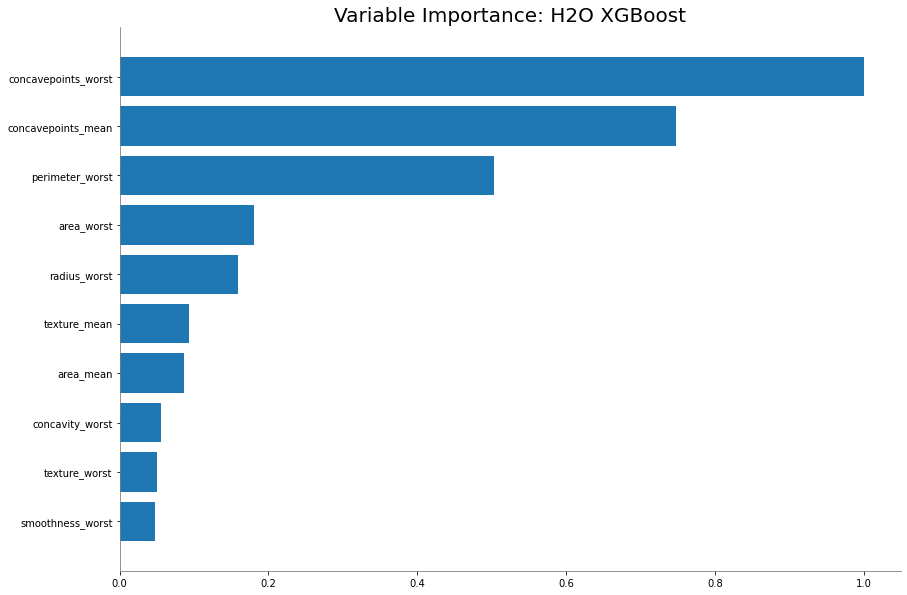

In [32]:
out.varimp_plot()

In [36]:
aml.leader.download_mojo(path = "./")

'/content/GLM_1_AutoML_20200718_140831.zip'

***Mojo is basically a binary object and we can easily deploy into python, java etc. It takes leader model, here our leader model is GLM 1***